In [1]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
df = pd.read_csv(os.path.join(KL_data_dir, "whole_genome/freq_bins/freq_bin_9_all.tsv"), sep = "\t")

In [3]:
df_melt = pd.melt(df, id_vars=['mu'], value_vars=[str(float(x)) for x in range(9)])

In [4]:
df_melt["bin"] = df_melt["variable"].astype(float).apply(post_analysis.freq_bin_to_AF_range)

In [5]:
df_melt = df_melt.rename({"value": "Proportion"}, axis = 1)

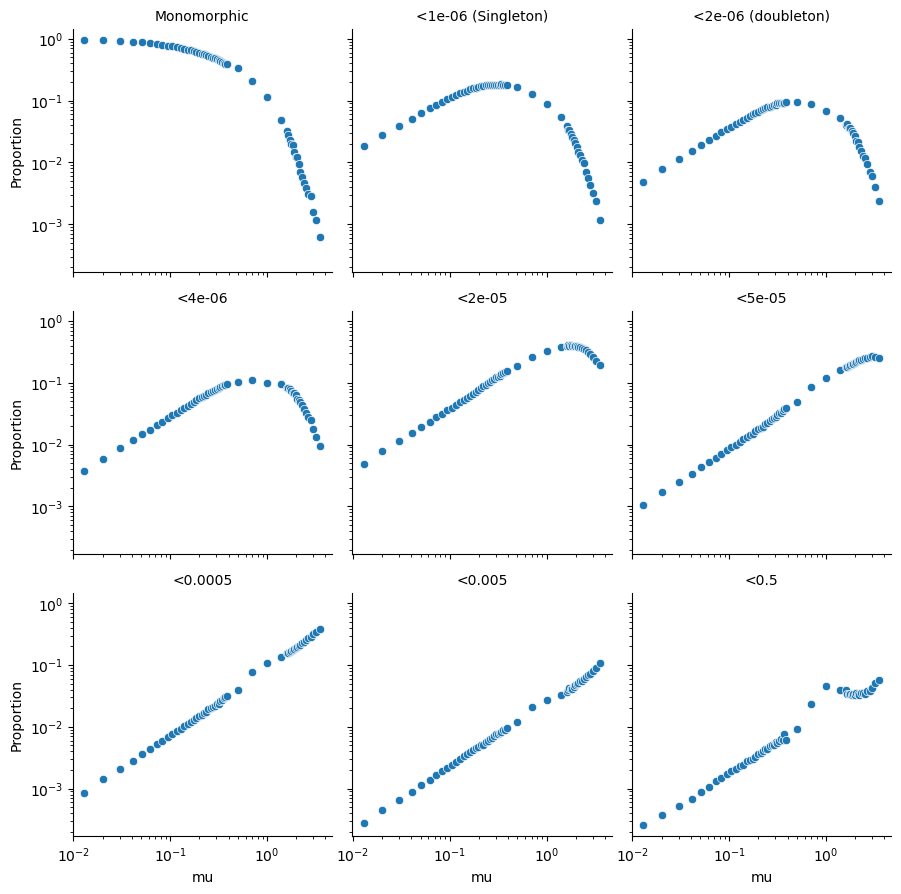

In [13]:
x_axis_name = "mu"
y_axis_name = "Proportion"

g = sns.FacetGrid(df_melt, col="bin", col_wrap=3)
g.map(sns.scatterplot, x_axis_name, y_axis_name)
g.set_titles("{col_name}")
g.set(xscale='log', yscale='log')

plt.savefig("neutral_sfs.svg", format="svg", bbox_inches="tight")

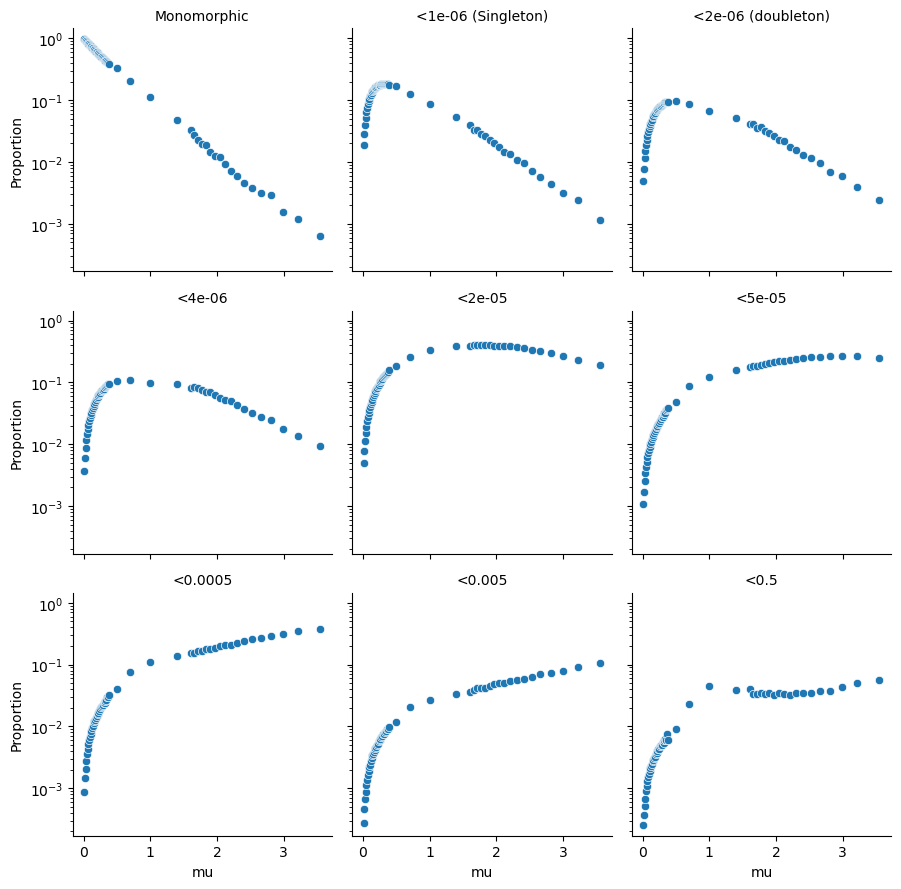

In [14]:
g = sns.FacetGrid(df_melt, col="bin", col_wrap=3)
g.map(sns.scatterplot, "mu", "Proportion")
# g.set(xscale='log')
g.set(yscale='log')
g.set_titles("{col_name}")

plt.savefig("neutral_sfs_ylog.svg", format="svg", bbox_inches="tight")

# Polymorphic SFS

In [14]:
df_polymorphic = df[[str(float(x)) for x in range(1, 9)]].div(df[[str(float(x)) for x in range(1, 9)]].sum(axis = 1), axis=0)

df_polymorphic["mu"] = df["mu"]

In [16]:
df_melt = pd.melt(df_polymorphic, id_vars=['mu'], value_vars=[str(float(x)) for x in range(1, 9)])

In [17]:
df_melt["bin"] = df_melt["variable"].astype(float).apply(post_analysis.freq_bin_to_AF_range)

df_melt = df_melt.rename({"value": "Proportion"}, axis = 1)

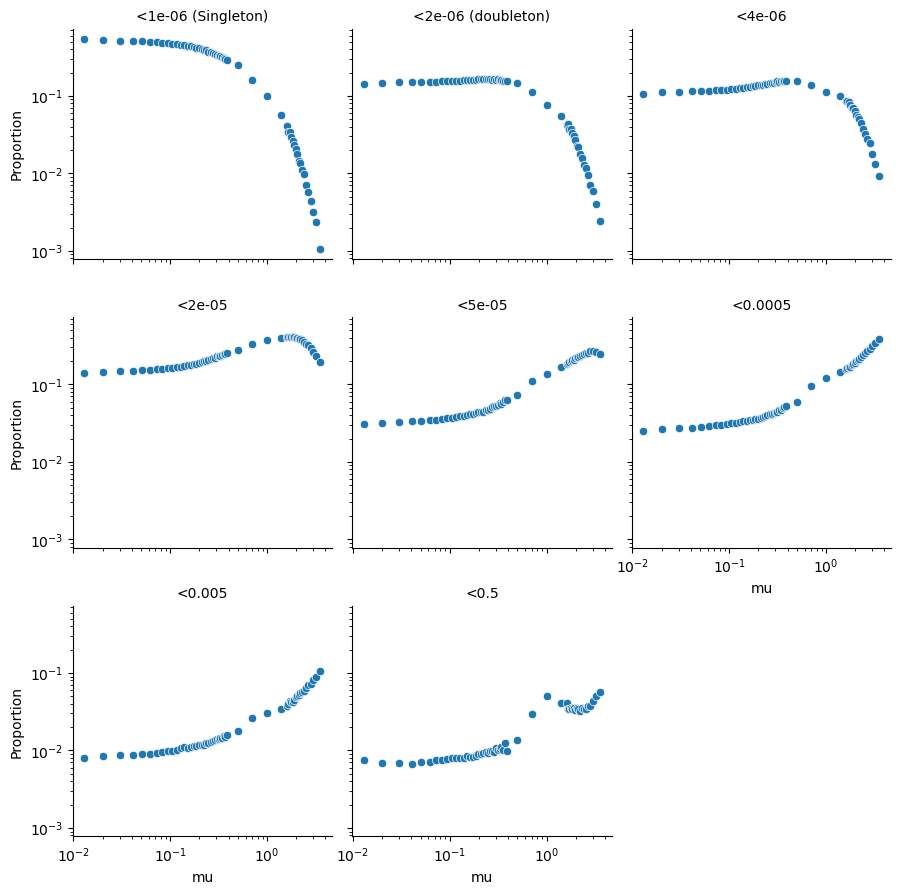

In [20]:
x_axis_name = "mu"
y_axis_name = "Proportion"

g = sns.FacetGrid(df_melt, col="bin", col_wrap=3)
g.map(sns.scatterplot, x_axis_name, y_axis_name)
g.set_titles("{col_name}")
g.set(xscale='log', yscale='log')

plt.savefig("neutral_sfs_polymorphic.svg", format="svg", bbox_inches="tight")

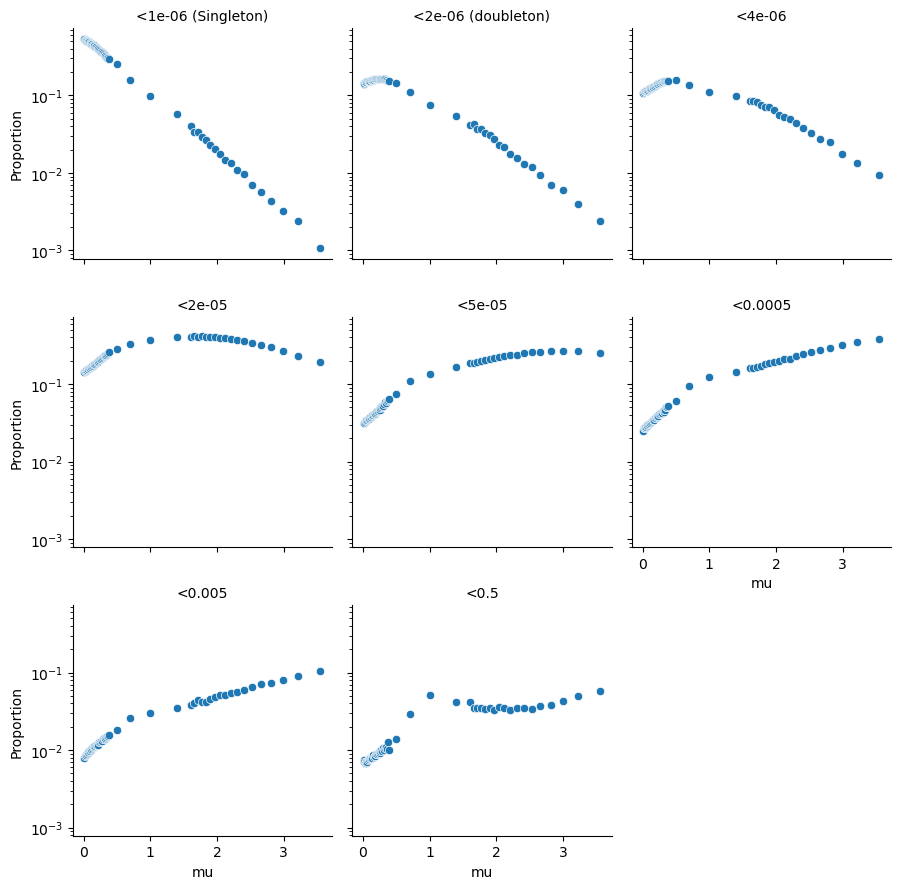

In [21]:
g = sns.FacetGrid(df_melt, col="bin", col_wrap=3)
g.map(sns.scatterplot, "mu", "Proportion")
# g.set(xscale='log')
g.set(yscale='log')
g.set_titles("{col_name}")

plt.savefig("neutral_sfs_ylog_polymorphic.svg", format="svg", bbox_inches="tight")